In [3]:
import pandas as pd 
import seaborn as sns
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

# XGBoost model hyperparameter tuning

Model was trained on this feature set: 'intensity|red|green|nz|slope|roughness|vert_angle'

And all statistics

---

**Best combination:**

n_estimators: 200 

max_depth: 4

learning_rate: 0.1

In [86]:
dir = Path("/DATA/Luis/thesis/scanline_classification/models/xgb_training/hyperparameter_tuning/xgb_model_performance_mean_statistics.csv")
df = pd.read_csv(dir)
df['params'] = "a:" + df['n_estimators'].astype(str) + " " + "b:" + df['max_depth'].astype(str) + " " + "c:" + df['learning_rate'].astype(str)
df["training_time_normalized"] = (df["training_time"] - df["training_time"].min()) / (df["training_time"].max() - df["training_time"].min())
df["f1_normalized"] = (df["f1"] - df["f1"].min()) / (df["f1"].max() - df["f1"].min())

df = df[df["training_time"] < 400]

df_sorted = df.sort_values(by="f1")
diff = np.argsort(np.abs(df_sorted["f1_normalized"] - df_sorted["training_time_normalized"])).tolist()

#training_data.columns[training_data.columns.str.contains('intensity|red|green|nz|slope|roughness|vert_angle')]

In [165]:
df_sorted.iloc[diff[-1]]

accuracy                             0.8343
f1                                   0.8347
precision                            0.8368
recall                               0.8343
training_time                        6.7588
n_estimators                            200
max_depth                                 4
learning_rate                           0.1
params                      a:200 b:4 c:0.1
training_time_normalized           0.010422
f1_normalized                      0.992708
Name: 166, dtype: object

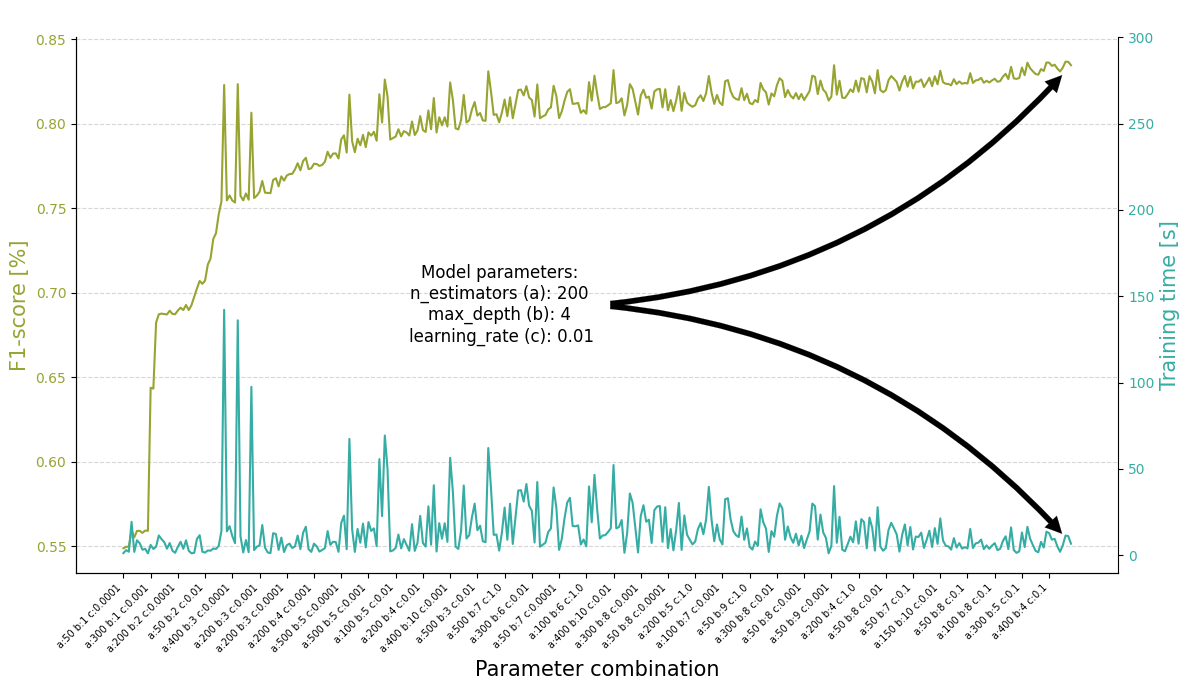

In [163]:
# Create a figure and a set of subplots
fig, ax1 = plt.subplots(figsize=(12, 7))

sns.lineplot(x="params", y="f1", data=df_sorted.iloc[diff], color=sns.color_palette("husl", 4)[1],ax=ax1) #df_sorted[df_sorted['n_estimators']==100]
ax1.set_xlabel('Parameter combination', fontdict={'size': 15})
ax1.set_ylabel('F1-score [%]', color=sns.color_palette("husl", 4)[1], fontdict={'size': 15})
ax1.tick_params(axis='y', labelcolor=sns.color_palette("husl", 4)[1])

# Create a second y-axis that shares the same x-axis
ax2 = ax1.twinx()

# Remove top and right spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

sns.lineplot(x="params", y="training_time", data=df_sorted.iloc[diff], color=sns.color_palette("husl", 4)[2], ax=ax2)
ax2.set_ylabel('Training time [s]', color=sns.color_palette("husl", 4)[2], fontdict={'size': 15})
ax2.tick_params(axis='y', labelcolor=sns.color_palette("husl", 4)[2])
ax2.set_ylim(-10, 300)

# Set the title
ax1.set_title(' ', fontdict={'size': 18})

# Set the size of the tick labels
ax1.tick_params(axis='x', labelsize=7)
ax1.set_xticks(ax1.get_xticks()[::10])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Add grid
ax1.grid(True, axis='y', linestyle='--', alpha=0.5)

# Draw arrows from the center of the plot to the last values of both lines
center_x = (ax1.get_xlim()[0] + ax1.get_xlim()[1]) / 2
center_y = (ax1.get_ylim()[0] + ax1.get_ylim()[1]) / 2
center_x2 = (ax2.get_xlim()[0] + ax2.get_xlim()[1]) / 2
center_y2 = (ax2.get_ylim()[0] + ax2.get_ylim()[1]) / 2
last_x = df_sorted.iloc[diff]["params"].values[-1]
last_y1 = df_sorted.iloc[diff]["f1"].values[-1]
last_y2 = df_sorted.iloc[diff]["training_time"].values[-1]
ax1.text(center_x-35, center_y, 'Model parameters: \nn_estimators (a): 200 \nmax_depth (b): 4 \nlearning_rate (c): 0.1', color='black', fontsize=12, ha='center', va='center')
ax1.annotate('', xy=(last_x, last_y1), xytext=(center_x, center_y),
             arrowprops=dict(facecolor='black', shrink=0.025, connectionstyle="arc3,rad=0.2", linewidth=0.1))
ax2.annotate('', xy=(last_x, last_y2), xytext=(center_x2, center_y2),
             arrowprops=dict(facecolor='black', shrink=0.025, connectionstyle="arc3,rad=-0.2", linewidth=0.1))


plt.tight_layout()
plt.show()

# For training and validation data

In [4]:
testing_dir = Path("/DATA/Luis/thesis/scanline_classification/data/final_results/2_hyperparameter_testing/all_results/testing_cls_results.csv")
validation_dir = Path("/DATA/Luis/thesis/scanline_classification/data/final_results/2_hyperparameter_testing/all_results/validation_cls_results.csv")
testing_df = pd.read_csv(testing_dir)
validation_df = pd.read_csv(validation_dir)

# Rename the first column
testing_df = testing_df.rename(columns={testing_df.columns[0]: "attribute"})
validation_df = validation_df.rename(columns={validation_df.columns[0]: "attribute"})

In [62]:
testing_avg = testing_df[testing_df["attribute"] == "weighted avg"]
validation_avg = validation_df[validation_df["attribute"] == "weighted avg"]

In [65]:
testing_avg = testing_df[testing_df["attribute"] == "tree trunk/branches"]
validation_avg = validation_df[validation_df["attribute"] == "tree trunk/branches"]

In [68]:
testing_avg_subset = testing_avg[['f1-score', "n_estimators", "max_depth","learning_rate","id"]]
validation_avg_subset = validation_avg[['f1-score', "n_estimators", "max_depth","learning_rate","id"]]

In [64]:
validation_avg_subset.groupby('id').describe().sort_values(by=('f1-score', 'mean'), ascending=False)

f1-score                                                              \
      count      mean       std       min       25%       50%       75%   
id                                                                        
23      6.0  0.879223  0.044800  0.793727  0.873718  0.897699  0.904733   
33      6.0  0.877081  0.049574  0.786315  0.863820  0.898854  0.906543   
43      6.0  0.876843  0.049688  0.786181  0.863098  0.898019  0.906604   
12      6.0  0.876805  0.051417  0.781320  0.865245  0.898373  0.908260   
42      6.0  0.875219  0.055361  0.776882  0.861722  0.886445  0.914001   
32      6.0  0.875026  0.053783  0.779895  0.859167  0.888133  0.912764   
22      6.0  0.874879  0.054917  0.775084  0.859813  0.893928  0.910860   
30      6.0  0.872203  0.051240  0.773870  0.867811  0.896841  0.897694   
40      6.0  0.871543  0.053704  0.769232  0.864989  0.896920  0.899448   
20      6.0  0.867468  0.051666  0.768227  0.863039  0.892095  0.893944   
24      6.0  0.866850  0.063898  0.752836  0.851466  0.880981  0.910329   
44      6.0  0.866814  0.063897  0.757985  0.842283  0.882074  0.913691   
34      6.0  0.866690  0.065960  0.749708  0.850292  0.880391  0.913047   
15      6.0  0.864731  0.068272  0.735842  0.853430  0.892025  0.906194   
13      6.0  0.864134  0.053323  0.762949  0.856302  0.886130  0.895621   
26      6.0  0.860577  0.072493  0.732889  0.841093  0.876153  0.912222   
47      6.0  0.859570  0.072961  0.732160  0.838222  0.875516  0.912522   
45      6.0  0.858588  0.073264  0.726012  0.841033  0.878858  0.907518   
41      6.0  0.858338  0.053428  0.755564  0.854150  0.880589  0.888028   
48      6.0  0.857893  0.071080  0.741136  0.827236  0.872700  0.911851   
38      6.0  0.857892  0.071080  0.741136  0.827236  0.872700  0.911851   
37      6.0  0.857746  0.075065  0.724033  0.836727  0.878118  0.909879   
25      6.0  0.857660  0.077423  0.714047  0.840625  0.887161  0.906410   
16      6.0  0.856984  0.079024  0.712416  0.837063  0.884574  0.908473   
14      6.0  0.856887  0.072773  0.728771  0.832918  0.878421  0.907210   
39      6.0  0.855304  0.076295  0.723042  0.826086  0.880107  0.908419   
35      6.0  0.853535  0.079373  0.710077  0.832091  0.879077  0.906263   
36      6.0  0.853415  0.079127  0.721038  0.821868  0.870180  0.913537   
46      6.0  0.853119  0.079527  0.721436  0.819740  0.869871  0.914373   
29      6.0  0.852717  0.077971  0.718076  0.821257  0.879366  0.906513   
18      6.0  0.850580  0.082023  0.708434  0.818013  0.879519  0.907399   
28      6.0  0.850247  0.079070  0.722799  0.814298  0.865586  0.911501   
27      6.0  0.849092  0.085830  0.694479  0.823804  0.879089  0.906472   
31      6.0  0.848638  0.062013  0.728879  0.845165  0.872554  0.884153   
49      6.0  0.848591  0.078660  0.730027  0.801417  0.866184  0.910781   
10      6.0  0.847478  0.061391  0.728914  0.843881  0.871493  0.881761   
17      6.0  0.846147  0.089990  0.684011  0.818018  0.881767  0.904865   
2       6.0  0.837890  0.061062  0.715960  0.847234  0.857094  0.869354   
3       6.0  0.837890  0.061062  0.715960  0.847234  0.857094  0.869354   
4       6.0  0.837762  0.054174  0.737406  0.827278  0.855367  0.874225   
5       6.0  0.837762  0.054174  0.737406  0.827278  0.855367  0.874225   
21      6.0  0.835384  0.072087  0.696632  0.830408  0.862284  0.878839   
11      6.0  0.824290  0.079649  0.669255  0.822474  0.853510  0.871262   
19      6.0  0.822956  0.112065  0.637012  0.766386  0.865823  0.903101   
0       6.0  0.739598  0.070064  0.614816  0.716503  0.766232  0.785506   
1       6.0  0.739598  0.070064  0.614816  0.716503  0.766232  0.785506   
9       6.0  0.703740  0.131339  0.492605  0.645068  0.724338  0.801885   
8       6.0  0.703740  0.131339  0.492605  0.645068  0.724338  0.801885   
7       6.0  0.690700  0.138807  0.467670  0.624008  0.719168  0.792790   
6       6.0  0.690700  0.138807  0.467670  0.624008  0.719168  0.792790   

             n_estimators  

In [61]:
validation_avg_subset.groupby('id').describe().sort_values(by=('f1-score', 'mean'), ascending=False)

f1-score                                                              \
      count      mean       std       min       25%       50%       75%   
id                                                                        
42      6.0  0.757007  0.052694  0.660227  0.750163  0.771716  0.778342   
26      6.0  0.754954  0.053567  0.660203  0.747096  0.765222  0.772717   
46      6.0  0.754833  0.052065  0.661611  0.747882  0.764165  0.774601   
36      6.0  0.754478  0.052845  0.660661  0.748130  0.761963  0.773688   
32      6.0  0.754418  0.052414  0.656385  0.745963  0.772281  0.782479   
34      6.0  0.754047  0.052881  0.655793  0.749086  0.768661  0.775338   
24      6.0  0.753400  0.052394  0.655401  0.747830  0.769527  0.776521   
44      6.0  0.752678  0.052112  0.655426  0.748825  0.766292  0.773945   
47      6.0  0.752664  0.050525  0.661423  0.744050  0.766619  0.771995   
48      6.0  0.751693  0.053699  0.658410  0.743325  0.759842  0.768607   
38      6.0  0.751693  0.053699  0.658410  0.743324  0.759842  0.768608   
37      6.0  0.751602  0.051299  0.660250  0.743065  0.765554  0.767773   
16      6.0  0.751135  0.053911  0.658842  0.741402  0.760103  0.766564   
28      6.0  0.750930  0.054209  0.656749  0.742335  0.759269  0.768120   
17      6.0  0.750519  0.056461  0.657088  0.737330  0.760680  0.763765   
49      6.0  0.748758  0.049985  0.657438  0.743269  0.761869  0.766109   
19      6.0  0.748473  0.055097  0.656085  0.736493  0.755460  0.765510   
22      6.0  0.747974  0.051832  0.650709  0.741103  0.766448  0.772457   
35      6.0  0.747353  0.051412  0.657003  0.736586  0.760703  0.764998   
39      6.0  0.747063  0.050071  0.656424  0.740612  0.759634  0.764434   
29      6.0  0.747046  0.050114  0.657890  0.739936  0.757663  0.763758   
27      6.0  0.746880  0.051721  0.657133  0.737585  0.759755  0.760112   
45      6.0  0.746433  0.049882  0.656164  0.739688  0.761265  0.762251   
14      6.0  0.746242  0.050283  0.653956  0.736360  0.762356  0.771942   
18      6.0  0.745462  0.052374  0.654284  0.737320  0.754482  0.761135   
25      6.0  0.745344  0.052358  0.654538  0.732132  0.758583  0.764562   
15      6.0  0.743799  0.057159  0.649989  0.725545  0.754717  0.762650   
43      6.0  0.739511  0.053975  0.641157  0.726576  0.758536  0.769372   
33      6.0  0.738774  0.055529  0.638954  0.725199  0.757816  0.764998   
12      6.0  0.736926  0.052953  0.640685  0.725139  0.757180  0.760335   
23      6.0  0.729872  0.057331  0.629257  0.712946  0.749777  0.754936   
40      6.0  0.702411  0.039051  0.639497  0.688229  0.703138  0.726281   
30      6.0  0.696867  0.041679  0.627137  0.683405  0.701427  0.720966   
13      6.0  0.690173  0.061671  0.578396  0.677212  0.713941  0.714956   
20      6.0  0.675298  0.041626  0.604443  0.662382  0.682252  0.696724   
5       6.0  0.652749  0.111821  0.479191  0.593318  0.670550  0.736795   
4       6.0  0.652749  0.111821  0.479191  0.593318  0.670550  0.736795   
41      6.0  0.631737  0.036367  0.574459  0.624408  0.632071  0.639860   
10      6.0  0.602766  0.036356  0.560813  0.583859  0.599273  0.608065   
31      6.0  0.600914  0.037538  0.555957  0.578980  0.601580  0.607676   
8       6.0  0.587879  0.113806  0.459073  0.503982  0.591314  0.626264   
9       6.0  0.587879  0.113806  0.459073  0.503982  0.591314  0.626264   
7       6.0  0.565613  0.101232  0.446965  0.486978  0.571490  0.613229   
6       6.0  0.565613  0.101232  0.446965  0.486978  0.571490  0.613229   
21      6.0  0.553318  0.039303  0.499248  0.531377  0.552550  0.572759   
2       6.0  0.545744  0.065109  0.468228  0.505665  0.539937  0.568460   
3       6.0  0.545744  0.065109  0.468228  0.505665  0.539937  0.568460   
11      6.0  0.507112  0.059850  0.407813  0.489588  0.510199  0.538901   
0       6.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1       6.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

             n_estimators  

In [69]:
testing_avg_subset.groupby('id').describe().sort_values(by=('f1-score', 'mean'), ascending=False)

f1-score                                                              \
      count      mean       std       min       25%       50%       75%   
id                                                                        
48      6.0  0.878607  0.013355  0.860891  0.869048  0.879799  0.886977   
38      6.0  0.878607  0.013355  0.860890  0.869048  0.879799  0.886977   
28      6.0  0.877674  0.013531  0.859708  0.868066  0.878768  0.886143   
46      6.0  0.877648  0.013296  0.859459  0.868967  0.878579  0.885451   
36      6.0  0.875748  0.013603  0.857190  0.866729  0.876876  0.883713   
49      6.0  0.875517  0.013575  0.857051  0.866550  0.876362  0.883762   
39      6.0  0.872771  0.013700  0.854299  0.863588  0.873678  0.881065   
26      6.0  0.872009  0.014073  0.853013  0.862438  0.873466  0.880185   
18      6.0  0.871370  0.014074  0.852843  0.861168  0.872653  0.880273   
44      6.0  0.870830  0.014370  0.851418  0.861147  0.872168  0.878990   
29      6.0  0.869198  0.014079  0.850591  0.859305  0.870433  0.877606   
47      6.0  0.869163  0.014244  0.850132  0.859416  0.870690  0.877062   
34      6.0  0.868134  0.014746  0.848226  0.858127  0.869783  0.876369   
37      6.0  0.866279  0.014544  0.847103  0.856021  0.868015  0.874466   
16      6.0  0.865298  0.014528  0.846042  0.855253  0.867067  0.873269   
24      6.0  0.863891  0.014882  0.844366  0.853292  0.865781  0.872053   
19      6.0  0.863618  0.014682  0.844997  0.852896  0.864395  0.872242   
27      6.0  0.861748  0.014873  0.842016  0.851396  0.863608  0.869853   
42      6.0  0.860401  0.015542  0.840093  0.849593  0.861415  0.869353   
45      6.0  0.860363  0.015229  0.840518  0.849337  0.862822  0.868283   
35      6.0  0.857140  0.015537  0.837531  0.845477  0.859554  0.864887   
32      6.0  0.857123  0.016272  0.836839  0.845362  0.857417  0.866667   
14      6.0  0.855432  0.015293  0.836124  0.844488  0.856924  0.862786   
17      6.0  0.854575  0.015599  0.835715  0.842386  0.856547  0.862376   
22      6.0  0.852175  0.016247  0.833210  0.839647  0.852354  0.861394   
25      6.0  0.851147  0.015674  0.831782  0.839397  0.853483  0.858062   
43      6.0  0.847205  0.016407  0.828162  0.834291  0.847745  0.855957   
33      6.0  0.841871  0.016884  0.822708  0.829097  0.841037  0.850781   
12      6.0  0.839282  0.017288  0.820157  0.825372  0.838528  0.849525   
15      6.0  0.838939  0.017946  0.818631  0.824815  0.840882  0.845906   
8       6.0  0.830618  0.020142  0.805063  0.815310  0.832016  0.844276   
9       6.0  0.830618  0.020142  0.805063  0.815310  0.832016  0.844276   
23      6.0  0.827040  0.020531  0.800729  0.815130  0.825793  0.835664   
40      6.0  0.812885  0.027234  0.772963  0.796693  0.820893  0.824387   
6       6.0  0.804000  0.025565  0.760233  0.795404  0.809364  0.818772   
7       6.0  0.804000  0.025565  0.760233  0.795404  0.809364  0.818772   
30      6.0  0.799489  0.029828  0.751746  0.786192  0.809979  0.810188   
13      6.0  0.780751  0.027060  0.742213  0.769969  0.776153  0.795013   
20      6.0  0.771083  0.030570  0.718688  0.760545  0.777466  0.788416   
5       6.0  0.733251  0.044693  0.667619  0.710713  0.732240  0.763498   
4       6.0  0.733251  0.044693  0.667619  0.710713  0.732240  0.763498   
41      6.0  0.730882  0.027965  0.682943  0.728676  0.729018  0.744301   
31      6.0  0.700483  0.023640  0.663020  0.696014  0.701718  0.704468   
10      6.0  0.699491  0.025311  0.656583  0.694423  0.700785  0.710207   
21      6.0  0.663149  0.024584  0.633051  0.648252  0.660704  0.673503   
2       6.0  0.628679  0.046376  0.541356  0.625751  0.637416  0.659526   
3       6.0  0.628679  0.046376  0.541356  0.625751  0.637416  0.659526   
11      6.0  0.625290  0.030350  0.580462  0.607294  0.632276  0.640411   
0       6.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1       6.0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

             n_estimators  

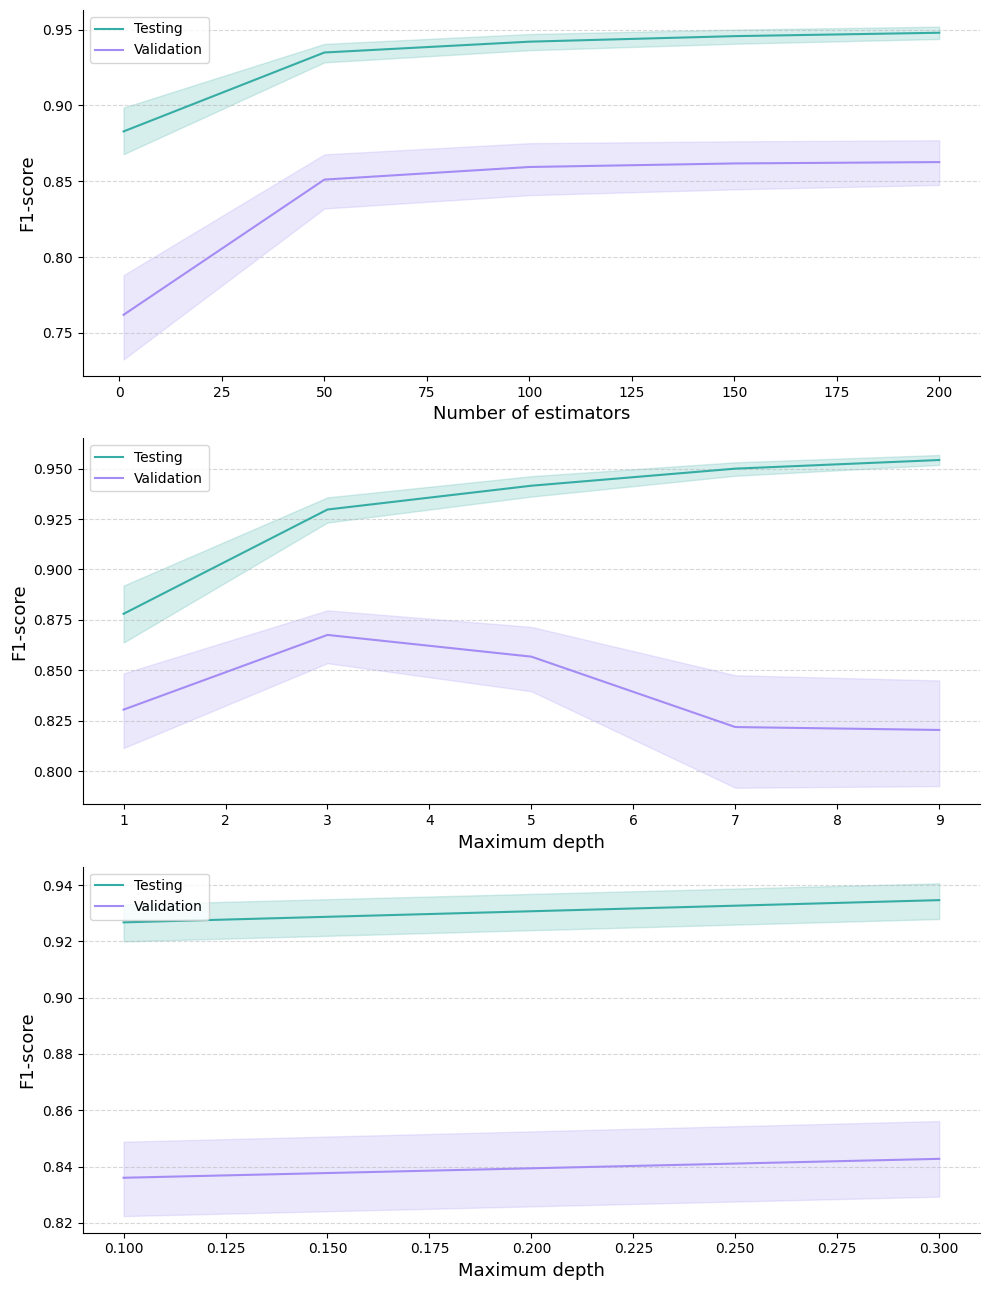

In [44]:
fig, axes = plt.subplots(3,1, figsize=(10, 13)) 

sns.lineplot(x='n_estimators', y='f1-score', data=testing_avg, color=sns.color_palette("husl", 4)[2], ax=axes[0], label="Testing")
sns.lineplot(x='n_estimators', y='f1-score', data=validation_avg, color=sns.color_palette("husl", 4)[3], ax=axes[0], label="Validation")
axes[0].set_xlabel('Number of estimators', fontdict={'size': 13})
axes[0].set_ylabel('F1-score', fontdict={'size': 13})
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].tick_params(axis='y', labelsize=10)
axes[0].tick_params(axis='x', labelsize=10)
axes[0].grid(True, axis='y', linestyle='--', alpha=0.5)

sns.lineplot(x='max_depth', y='f1-score', data=testing_avg, color=sns.color_palette("husl", 4)[2], ax=axes[1], label="Testing")
sns.lineplot(x='max_depth', y='f1-score', data=validation_avg, color=sns.color_palette("husl", 4)[3], ax=axes[1], label="Validation")
axes[1].set_xlabel('Maximum depth', fontdict={'size': 13})
axes[1].set_ylabel('F1-score', fontdict={'size': 13})
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].tick_params(axis='y', labelsize=10)
axes[1].tick_params(axis='x', labelsize=10)
axes[1].grid(True, axis='y', linestyle='--', alpha=0.5)

sns.lineplot(x='learning_rate', y='f1-score', data=testing_avg, color=sns.color_palette("husl", 4)[2], ax=axes[2], label="Testing")
sns.lineplot(x='learning_rate', y='f1-score', data=validation_avg, color=sns.color_palette("husl", 4)[3], ax=axes[2], label="Validation")
axes[2].set_xlabel('Maximum depth', fontdict={'size': 13})
axes[2].set_ylabel('F1-score', fontdict={'size': 13})
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].tick_params(axis='y', labelsize=10)
axes[2].tick_params(axis='x', labelsize=10)
axes[2].grid(True, axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

## Hyperparameters per class 

In [5]:
testing_df_unclassified = testing_df[testing_df["attribute"] == "unclassified"]
validation_df_unclassified = validation_df[validation_df["attribute"] == "unclassified"]

testing_df_mmo = testing_df[testing_df["attribute"] == "man-made objects"]
validation_df_mmo = validation_df[validation_df["attribute"] == "man-made objects"]

testing_df_ground = testing_df[testing_df["attribute"] == "ground"]
validation_df_ground = validation_df[validation_df["attribute"] == "ground"]

testing_df_tree = testing_df[testing_df["attribute"] == "tree trunk/branches"]
validation_df_tree = validation_df[validation_df["attribute"] == "tree trunk/branches"]

testing_df_leaves = testing_df[testing_df["attribute"] == "leaves"]
validation_df_leaves = validation_df[validation_df["attribute"] == "leaves"]

testing_df_lowveg = testing_df[testing_df["attribute"] == "low vegetation"]
validation_df_lowveg = validation_df[validation_df["attribute"] == "low vegetation"]

In [6]:
validation_df_mmo

,attribute,precision,recall,f1-score,support,n_estimators,max_depth,learning_rate,filename,fold,id
1,man-made objects,0.526314,0.828536,0.643717,711693.0,1,1,0.3,SiteD_RHV_01_Labeled_Subsampled,1,0
10,man-made objects,0.388297,0.808718,0.524677,428975.0,1,1,0.3,SiteD_RHV_02_Labeled_Subsampled,2,0
19,man-made objects,0.367555,0.904250,0.522661,501335.0,1,1,0.3,SiteD_RHV_03_Labeled_Subsampled,3,0
28,man-made objects,0.622017,0.881819,0.729477,935600.0,1,1,0.3,SiteD_RHV_04_Labeled_Subsampled,4,0
37,man-made objects,0.733896,0.882791,0.801487,1312630.0,1,1,0.3,SiteD_RHV_05_Labeled_Subsampled,5,0
...,...,...,...,...,...,...,...,...,...,...,...
2656,man-made objects,0.429045,0.834566,0.566736,428975.0,200,9,0.1,SiteD_RHV_02_Labeled_Subsampled,2,49
2665,man-made objects,0.420557,0.869680,0.566950,501335.0,200,9,0.1,SiteD_RHV_03_Labeled_Subsampled,3,49
2674,man-made objects,0.888678,0.860735,0.874484,935600.0,200,9,0.1,SiteD_RHV_04_Labeled_Subsampled,4,49
2683,man-made objects,0.950001,0.870632,0.908587,1312630.0,200,9,0.1,SiteD_RHV_05_Labeled_Subsampled,5,49


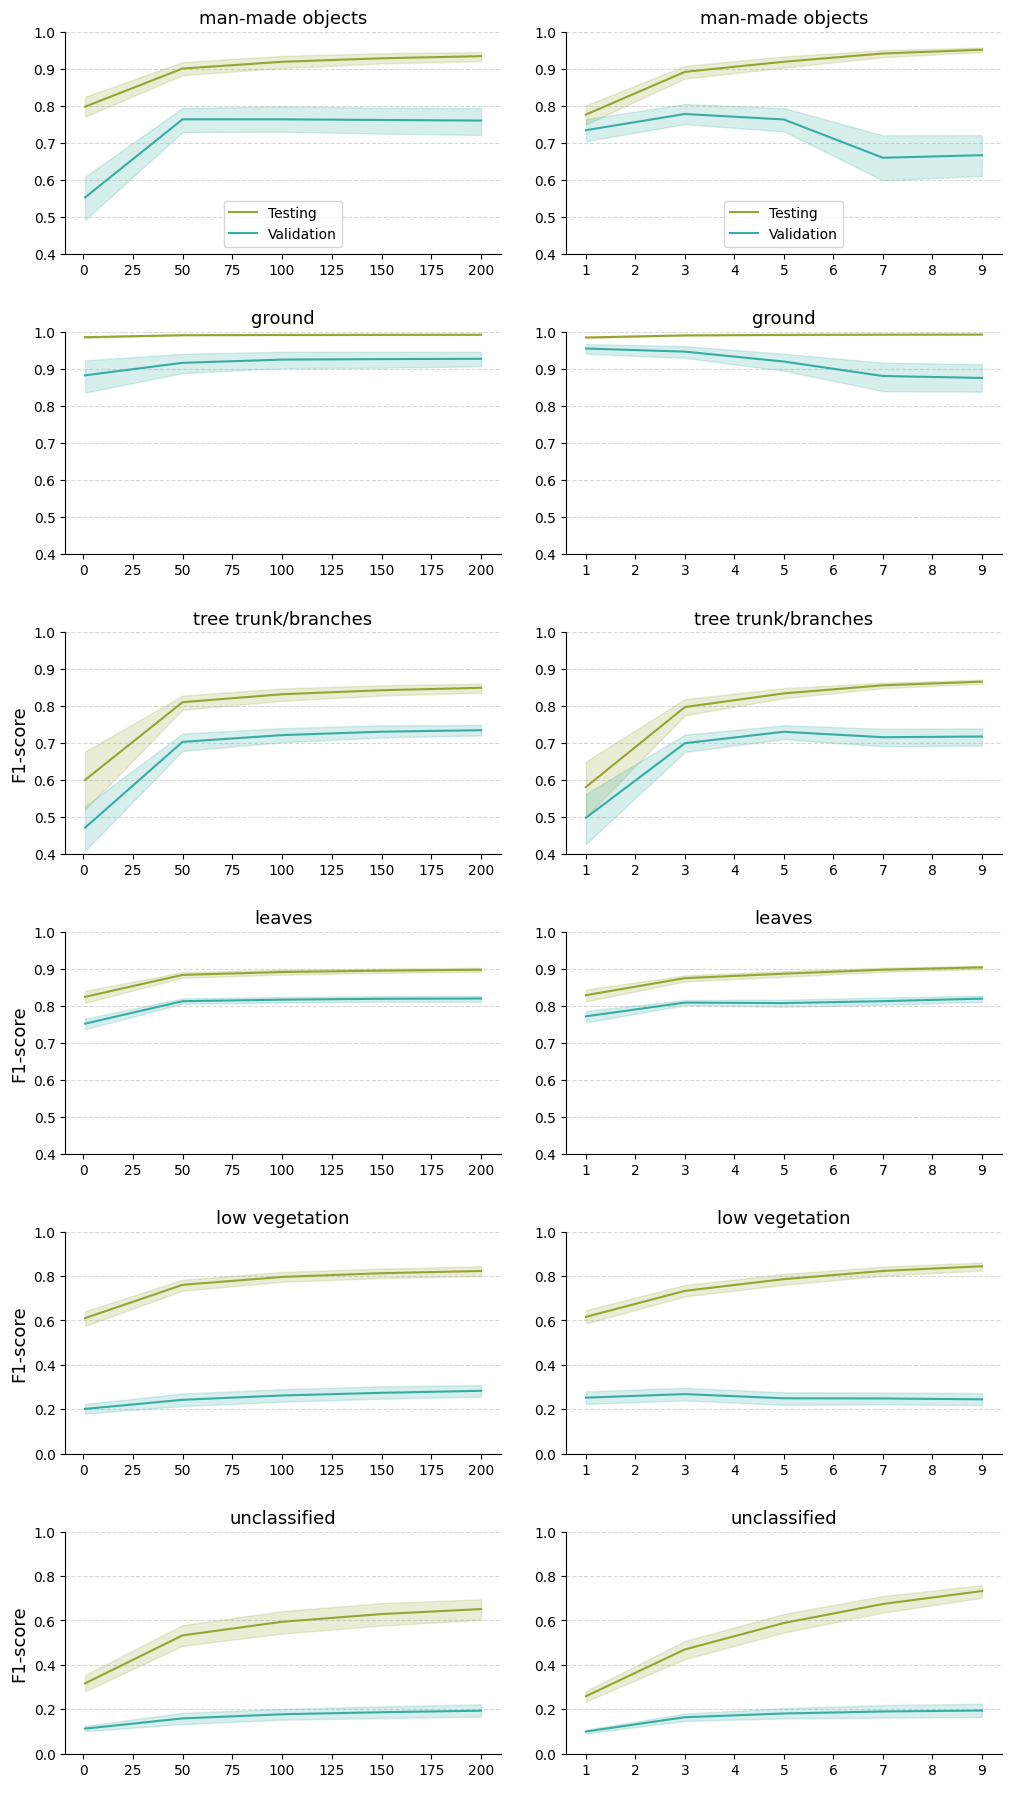

In [20]:
fig, axes = plt.subplots(2,2, figsize=(10, 18), constrained_layout=True) 

sns.lineplot(x='n_estimators', y='f1-score', data=testing_df_mmo, color=sns.color_palette("husl", 4)[1], ax=axes[0,0], label="Testing")
sns.lineplot(x='n_estimators', y='f1-score', data=validation_df_mmo, color=sns.color_palette("husl", 4)[2], ax=axes[0,0], label="Validation")
axes[0,0].set_xlabel(' ', fontdict={'size': 13})
axes[0,0].set_ylabel(' ', fontdict={'size': 13})
axes[0,0].spines['top'].set_visible(False)
axes[0,0].spines['right'].set_visible(False)
axes[0,0].tick_params(axis='y', labelsize=10)
axes[0,0].tick_params(axis='x', labelsize=10)
axes[0,0].set_ylim(0.4, 1)
axes[0,0].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[0,0].set_title(f"{testing_df_mmo['attribute'].values[0]}", fontdict={'size': 13})
axes[0,0].legend(loc='lower center')

sns.lineplot(x='max_depth', y='f1-score', data=testing_df_mmo, color=sns.color_palette("husl", 4)[1], ax=axes[0,1], label="Testing")
sns.lineplot(x='max_depth', y='f1-score', data=validation_df_mmo, color=sns.color_palette("husl", 4)[2], ax=axes[0,1], label="Validation")
axes[0,1].set_xlabel(' ', fontdict={'size': 13})
axes[0,1].set_ylabel(' ', fontdict={'size': 13})
axes[0,1].spines['top'].set_visible(False)
axes[0,1].spines['right'].set_visible(False)
axes[0,1].tick_params(axis='y', labelsize=10)
axes[0,1].tick_params(axis='x', labelsize=10)
axes[0,1].set_ylim(0.4, 1)
axes[0,1].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[0,1].set_title(f"{testing_df_mmo['attribute'].values[0]}", fontdict={'size': 13})
axes[0,1].legend(loc='lower center')

sns.lineplot(x='n_estimators', y='f1-score', data=testing_df_ground, color=sns.color_palette("husl", 4)[1], ax=axes[1,0])
sns.lineplot(x='n_estimators', y='f1-score', data=validation_df_ground, color=sns.color_palette("husl", 4)[2], ax=axes[1,0])
axes[1,0].set_xlabel(' ', fontdict={'size': 13})
axes[1,0].set_ylabel(' ', fontdict={'size': 13})
axes[1,0].spines['top'].set_visible(False)
axes[1,0].spines['right'].set_visible(False)
axes[1,0].tick_params(axis='y', labelsize=10)
axes[1,0].tick_params(axis='x', labelsize=10)
axes[1,0].set_ylim(0.4, 1)
axes[1,0].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[1,0].set_title(f"{testing_df_ground['attribute'].values[0]}", fontdict={'size': 13})

sns.lineplot(x='max_depth', y='f1-score', data=testing_df_ground, color=sns.color_palette("husl", 4)[1], ax=axes[1,1])
sns.lineplot(x='max_depth', y='f1-score', data=validation_df_ground, color=sns.color_palette("husl", 4)[2], ax=axes[1,1])
axes[1,1].set_xlabel(' ', fontdict={'size': 13})
axes[1,1].set_ylabel(' ', fontdict={'size': 13})
axes[1,1].spines['top'].set_visible(False)
axes[1,1].spines['right'].set_visible(False)
axes[1,1].tick_params(axis='y', labelsize=10)
axes[1,1].tick_params(axis='x', labelsize=10)
axes[1,1].set_ylim(0.4, 1)
axes[1,1].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[1,1].set_title(f"{testing_df_ground['attribute'].values[0]}", fontdict={'size': 13})

sns.lineplot(x='n_estimators', y='f1-score', data=testing_df_tree, color=sns.color_palette("husl", 4)[1], ax=axes[2,0])
sns.lineplot(x='n_estimators', y='f1-score', data=validation_df_tree, color=sns.color_palette("husl", 4)[2], ax=axes[2,0])
axes[2,0].set_xlabel(' ', fontdict={'size': 13})
axes[2,0].set_ylabel('F1-score', fontdict={'size': 13})
axes[2,0].spines['top'].set_visible(False)
axes[2,0].spines['right'].set_visible(False)
axes[2,0].tick_params(axis='y', labelsize=10)
axes[2,0].tick_params(axis='x', labelsize=10)
axes[2,0].set_ylim(0.4, 1)
axes[2,0].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[2,0].set_title(f"{testing_df_tree['attribute'].values[0]}", fontdict={'size': 13})

sns.lineplot(x='max_depth', y='f1-score', data=testing_df_tree, color=sns.color_palette("husl", 4)[1], ax=axes[2,1])
sns.lineplot(x='max_depth', y='f1-score', data=validation_df_tree, color=sns.color_palette("husl", 4)[2], ax=axes[2,1])
axes[2,1].set_xlabel(' ', fontdict={'size': 13})
axes[2,1].set_ylabel(' ', fontdict={'size': 13})
axes[2,1].spines['top'].set_visible(False)
axes[2,1].spines['right'].set_visible(False)
axes[2,1].tick_params(axis='y', labelsize=10)
axes[2,1].tick_params(axis='x', labelsize=10)
axes[2,1].set_ylim(0.4, 1)
axes[2,1].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[2,1].set_title(f"{testing_df_tree['attribute'].values[0]}", fontdict={'size': 13})

sns.lineplot(x='n_estimators', y='f1-score', data=testing_df_leaves, color=sns.color_palette("husl", 4)[1], ax=axes[3,0])
sns.lineplot(x='n_estimators', y='f1-score', data=validation_df_leaves, color=sns.color_palette("husl", 4)[2], ax=axes[3,0])
axes[3,0].set_xlabel(' ', fontdict={'size': 13})
axes[3,0].set_ylabel('F1-score', fontdict={'size': 13})
axes[3,0].spines['top'].set_visible(False)
axes[3,0].spines['right'].set_visible(False)
axes[3,0].tick_params(axis='y', labelsize=10)
axes[3,0].tick_params(axis='x', labelsize=10)
axes[3,0].set_ylim(0.4, 1)
axes[3,0].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[3,0].set_title(f"{testing_df_leaves['attribute'].values[0]}", fontdict={'size': 13})

sns.lineplot(x='max_depth', y='f1-score', data=testing_df_leaves, color=sns.color_palette("husl", 4)[1], ax=axes[3,1])
sns.lineplot(x='max_depth', y='f1-score', data=validation_df_leaves, color=sns.color_palette("husl", 4)[2], ax=axes[3,1])
axes[3,1].set_xlabel(' ', fontdict={'size': 13})
axes[3,1].set_ylabel(' ', fontdict={'size': 13})
axes[3,1].spines['top'].set_visible(False)
axes[3,1].spines['right'].set_visible(False)
axes[3,1].tick_params(axis='y', labelsize=10)
axes[3,1].tick_params(axis='x', labelsize=10)
axes[3,1].set_ylim(0.4, 1)
axes[3,1].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[3,1].set_title(f"{testing_df_leaves['attribute'].values[0]}", fontdict={'size': 13})


sns.lineplot(x='n_estimators', y='f1-score', data=testing_df_lowveg, color=sns.color_palette("husl", 4)[1], ax=axes[4,0])
sns.lineplot(x='n_estimators', y='f1-score', data=validation_df_lowveg, color=sns.color_palette("husl", 4)[2], ax=axes[4,0])
axes[4,0].set_xlabel(' ', fontdict={'size': 13})
axes[4,0].set_ylabel('F1-score', fontdict={'size': 13})
axes[4,0].spines['top'].set_visible(False)
axes[4,0].spines['right'].set_visible(False)
axes[4,0].tick_params(axis='y', labelsize=10)
axes[4,0].tick_params(axis='x', labelsize=10)
axes[4,0].set_ylim(0, 1)
axes[4,0].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[4,0].set_title(f"{testing_df_lowveg['attribute'].values[0]}", fontdict={'size': 13})

sns.lineplot(x='max_depth', y='f1-score', data=testing_df_lowveg, color=sns.color_palette("husl", 4)[1], ax=axes[4,1])
sns.lineplot(x='max_depth', y='f1-score', data=validation_df_lowveg, color=sns.color_palette("husl", 4)[2], ax=axes[4,1])
axes[4,1].set_xlabel(' ', fontdict={'size': 13})
axes[4,1].set_ylabel(' ', fontdict={'size': 13})
axes[4,1].spines['top'].set_visible(False)
axes[4,1].spines['right'].set_visible(False)
axes[4,1].tick_params(axis='y', labelsize=10)
axes[4,1].tick_params(axis='x', labelsize=10)
axes[4,1].set_ylim(0, 1)
axes[4,1].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[4,1].set_title(f"{testing_df_lowveg['attribute'].values[0]}", fontdict={'size': 13})


sns.lineplot(x='n_estimators', y='f1-score', data=testing_df_unclassified, color=sns.color_palette("husl", 4)[1], ax=axes[5,0])
sns.lineplot(x='n_estimators', y='f1-score', data=validation_df_unclassified, color=sns.color_palette("husl", 4)[2], ax=axes[5,0])
axes[5,0].set_xlabel(' ', fontdict={'size': 13})
axes[5,0].set_ylabel('F1-score', fontdict={'size': 13})
axes[5,0].spines['top'].set_visible(False)
axes[5,0].spines['right'].set_visible(False)
axes[5,0].tick_params(axis='y', labelsize=10)
axes[5,0].tick_params(axis='x', labelsize=10)
axes[5,0].set_ylim(0, 1)
axes[5,0].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[5,0].set_title(f"{testing_df_unclassified['attribute'].values[0]}", fontdict={'size': 13})

sns.lineplot(x='max_depth', y='f1-score', data=testing_df_unclassified, color=sns.color_palette("husl", 4)[1], ax=axes[5,1])
sns.lineplot(x='max_depth', y='f1-score', data=validation_df_unclassified, color=sns.color_palette("husl", 4)[2], ax=axes[5,1])
axes[5,1].set_xlabel(' ', fontdict={'size': 13})
axes[5,1].set_ylabel(' ', fontdict={'size': 13})
axes[5,1].spines['top'].set_visible(False)
axes[5,1].spines['right'].set_visible(False)
axes[5,1].tick_params(axis='y', labelsize=10)
axes[5,1].tick_params(axis='x', labelsize=10)
axes[5,1].set_ylim(0, 1)
axes[5,1].grid(True, axis='y', linestyle='--', alpha=0.5)
axes[5,1].set_title(f"{testing_df_unclassified['attribute'].values[0]}", fontdict={'size': 13})

#plt.tight_layout()
plt.show()

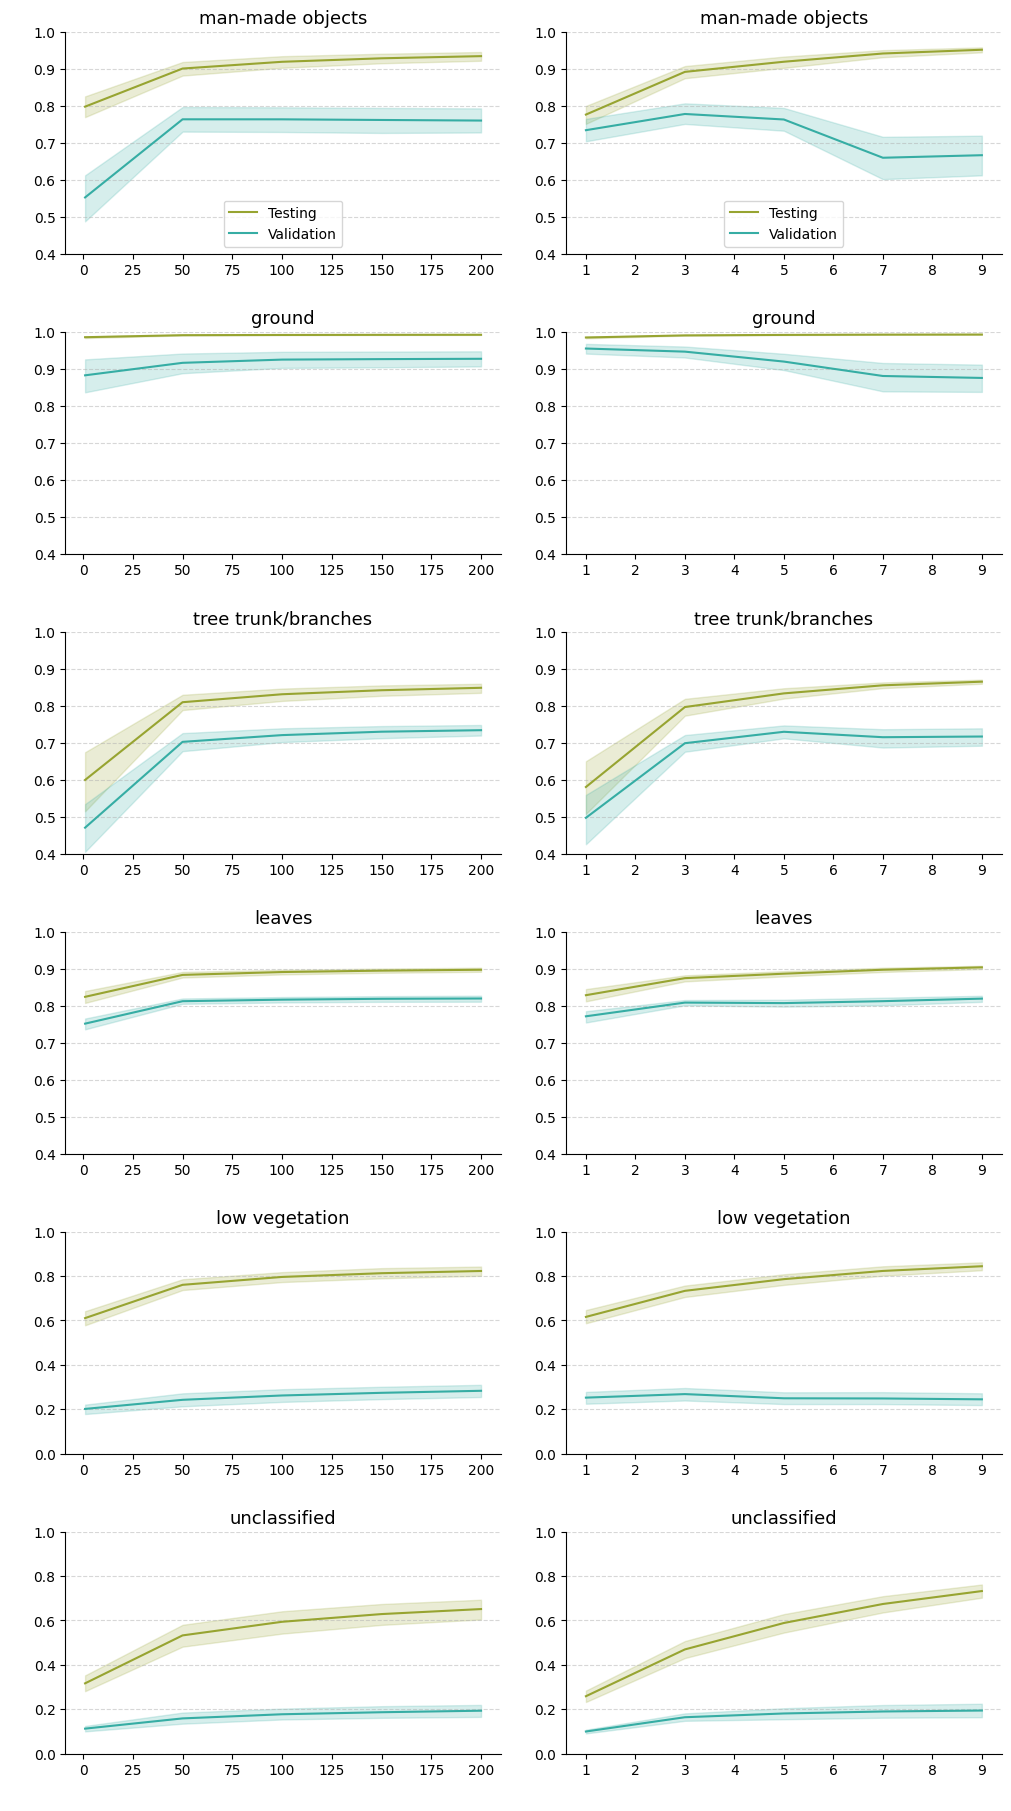

In [83]:
def plot_data(testing_df, validation_df, ax, x_var, y_var, color1, color2, title, legend=True, y_lim=(0.4, 1)):
    if legend:
        sns.lineplot(x=x_var, y=y_var, data=testing_df, color=color1, ax=ax, label="Testing")
        sns.lineplot(x=x_var, y=y_var, data=validation_df, color=color2, ax=ax, label="Validation")
        ax.legend(loc='lower center')
    else:
        sns.lineplot(x=x_var, y=y_var, data=testing_df, color=color1, ax=ax)
        sns.lineplot(x=x_var, y=y_var, data=validation_df, color=color2, ax=ax)
    
    ax.set_xlabel(' ', fontdict={'size': 13})
    ax.set_ylabel(' ', fontdict={'size': 13})
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='x', labelsize=10)
    ax.set_ylim(y_lim)
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)
    ax.set_title(title, fontdict={'size': 13})
    

fig, axes = plt.subplots(6,2, figsize=(10, 18), constrained_layout=True) 

color1 = sns.color_palette("husl", 4)[1]
color2 = sns.color_palette("husl", 4)[2]

plot_data(testing_df_mmo, validation_df_mmo, axes[0,0], 'n_estimators', 'f1-score', color1, color2, testing_df_mmo['attribute'].values[0])
plot_data(testing_df_mmo, validation_df_mmo, axes[0,1], 'max_depth', 'f1-score', color1, color2, testing_df_mmo['attribute'].values[0])
plot_data(testing_df_ground, validation_df_ground, axes[1,0], 'n_estimators', 'f1-score', color1, color2, testing_df_ground['attribute'].values[0], False)
plot_data(testing_df_ground, validation_df_ground, axes[1,1], 'max_depth', 'f1-score', color1, color2, testing_df_ground['attribute'].values[0], False)
plot_data(testing_df_tree, validation_df_tree, axes[2,0], 'n_estimators', 'f1-score', color1, color2, testing_df_tree['attribute'].values[0], False)
plot_data(testing_df_tree, validation_df_tree, axes[2,1], 'max_depth', 'f1-score', color1, color2, testing_df_tree['attribute'].values[0], False)
plot_data(testing_df_leaves, validation_df_leaves, axes[3,0], 'n_estimators', 'f1-score', color1, color2, testing_df_leaves['attribute'].values[0], False)
plot_data(testing_df_leaves, validation_df_leaves, axes[3,1], 'max_depth', 'f1-score', color1, color2, testing_df_leaves['attribute'].values[0], False)
plot_data(testing_df_lowveg, validation_df_lowveg, axes[4,0], 'n_estimators', 'f1-score', color1, color2, testing_df_lowveg['attribute'].values[0], False, (0, 1))
plot_data(testing_df_lowveg, validation_df_lowveg, axes[4,1], 'max_depth', 'f1-score', color1, color2, testing_df_lowveg['attribute'].values[0], False, (0, 1))
plot_data(testing_df_unclassified, validation_df_unclassified, axes[5,0], 'n_estimators', 'f1-score', color1, color2, testing_df_unclassified['attribute'].values[0], False, (0, 1))
plot_data(testing_df_unclassified, validation_df_unclassified, axes[5,1], 'max_depth', 'f1-score', color1, color2, testing_df_unclassified['attribute'].values[0], False, (0, 1))